In astronomy, the observed brightness of an object on the sky is specified on a logarithmic scale that is based on flux ratios 
: 
$m =M−2.5\log_{10} \frac{F}{F_0}$ . 

The convention is to define $F_0 = L/4πr^2$  as the radiative flux at distance $r_0 = 10 pc$. 

While the absolute magnitude M is a constant parameter for a star of given luminosity L, its apparent magnitude m depends on its distance r. The relation $F \propto 1/r^2$  for the radiative flux implies $m−M=5\log_{10}\frac{r} {10 pc}$. 

Hence, the star's distance can be determined if both the apparent and absolute magnitude are known. 


However, extinction due to interstellar dust modifies this relation: 
$$
m−M=5\log_{10}\frac{r} {10 pc} + kr  \,(\star)
$$

Although the extinction varies significantly within the Galaxy, the mean value $k = 2 ×10^{−3} pc^{−1}$ can be assumed for the extinction per unit distance.

Compute and plot r in units of pc for B0 main sequence stars with an absolute magnitude M =−4.0 and apparent magnitudes m in the range from −4.0 to 6.0 in the visual band.

How are the distances affected by extinction? To answer this question, you will need to solve Eq.($\star$) numerically for each data point. 

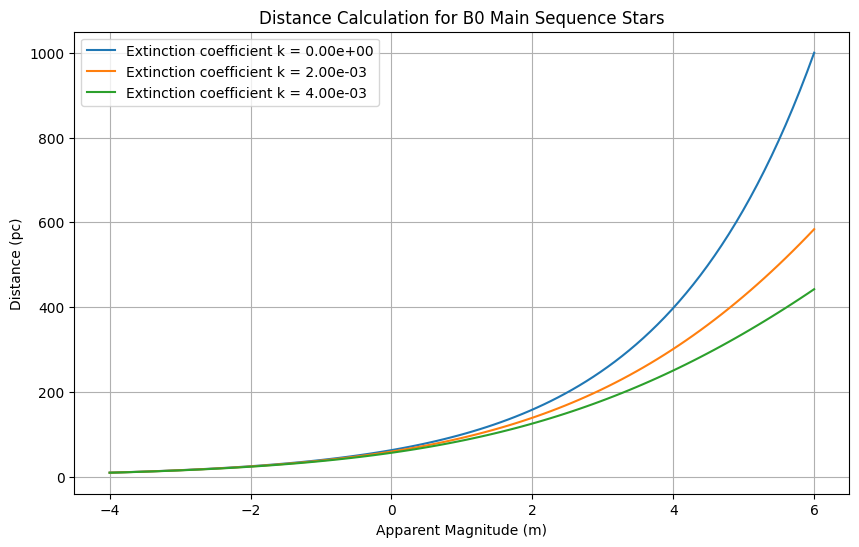

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = -4.0  # Absolute magnitude for B0 main sequence stars
m_values = np.linspace(-4.0, 6.0, 100)  # Apparent magnitudes range

# List of different extinction coefficients k
k_values = [0, 2e-3, 4e-3]  # k should be positive for extinction

# Function to calculate f(r)
def f(r, m, M, k):
    return m - M - 5 * np.log10(r / 10.0) - k * r

# Function to calculate the derivative f'(r)
def df(r, k):
    return -5 / (r * np.log10(10)) - k

# Newton-Raphson Method to find distance r
def newton_raphson(m, M, k, initial_guess=10.0, tol=1e-6, max_iter=100):
    r = initial_guess
    for i in range(max_iter):
        f_value = f(r, m, M, k)
        df_value = df(r, k)
        
        if df_value == 0:  # Avoid division by zero
            return np.nan  # Return NaN if derivative is zero
        
        r_new = r - f_value / df_value
        
        if abs(r_new - r) < tol:
            return r_new  # Converged
        r = r_new
        
    return np.nan  # Return NaN if no convergence after max_iter

# Plotting for different k values
plt.figure(figsize=(10, 6))

for k in k_values:
    distances = []
    for m in m_values:
        r_solution = newton_raphson(m, M, k)
        distances.append(r_solution)
        
    distances = np.array(distances)
    distances = np.where(distances > 0, distances, np.nan)  # Set negative distances to NaN for plotting

    # Plot the distances for the current k value
    plt.plot(m_values, distances, label=f'Extinction coefficient k = {k:.2e}')

# Plot aesthetics
plt.title('Distance Calculation for B0 Main Sequence Stars')
plt.xlabel('Apparent Magnitude (m)')
plt.ylabel('Distance (pc)')
plt.grid(True)
plt.legend()
plt.show()

In [2]:
import numpy as np

# Constants for Isothermal Sphere
sigma = 10  # km/s
rmax_isothermal = 10  # pc 
G = 4.3009172706E-3  # pc Msun^-1 (km/s)^2

def rho_isothermal(r):
    """Density function for the singular isothermal sphere."""
    return (sigma**2) / (2 * np.pi * G * r**2)

def integrand_isothermal(r):
    """Integrand function for calculating mass of the isothermal sphere."""
    return 4 * np.pi * r**2 * rho_isothermal(r)

def trapezoidal_rule(f_values, r):
    """Calculates the integral using the trapezoidal rule."""
    h = (r[-1] - r[0]) / (len(r) - 1)  # Calculate step size based on r
    return (h * 0.5 * f_values[0]) + (h * 0.5 * f_values[-1]) + (h * np.sum(f_values[1:-1]))

# Calculate mass for Isothermal Sphere
N = 1000
r_isothermal = np.linspace(1e-10, rmax_isothermal, N)  # Avoid zero to prevent divergence
f_values_isothermal = integrand_isothermal(r_isothermal)

# Calculate Mass using the trapezoidal rule
mass_isothermal = trapezoidal_rule(f_values_isothermal, r_isothermal)

# Analytical Integration for validation
analytical_mass_isothermal = (2 * sigma**2 / G) * rmax_isothermal

# Output results for Isothermal Sphere
print(f"Mass calculated with the Trapezoid rule (Isothermal Sphere): {mass_isothermal:.5e} Msun")
print(f"The analytical integral (Isothermal Sphere) is: {analytical_mass_isothermal:.5e} Msun")
print(f"Error (Isothermal Sphere): {mass_isothermal - analytical_mass_isothermal:.5e} Msun\n")

# Parameters for NFW Profile
rho0 = 1e8  # Solar masses kpc^-3
rs = 10.0  # kpc
rmax_NFW = 100. * rs  # Change rmax for NFW

def rho_NFW(r):
    """Density function for the Navarro-Frenk-White (NFW) profile."""
    x = r / rs
    return rho0 / (x * (1.0 + x)**2)

def integrand_NFW(r):
    """Integrand function for calculating mass of the NFW profile."""
    if r < 1e-30:  # Avoid singularity at r=0
        return 0.0
    else:
        return 4.0 * np.pi * r**2 * rho_NFW(r)

# Prepare for NFW Integration
r_NFW = np.linspace(1e-10, rmax_NFW, N)  # Avoid zero for integration
f_values_NFW = np.array([integrand_NFW(r_i) for r_i in r_NFW])  # Calculate integrand values

# Calculate Mass using the trapezoidal rule for NFW
mass_NFW = trapezoidal_rule(f_values_NFW, r_NFW)

# Output results for NFW Profile
print(f"Mass calculated with the Trapezoid rule (NFW Profile): {mass_NFW:.5e} Msun")

Mass calculated with the Trapezoid rule (Isothermal Sphere): 4.65017e+05 Msun
The analytical integral (Isothermal Sphere) is: 4.65017e+05 Msun
Error (Isothermal Sphere): -4.65033e-06 Msun

Mass calculated with the Trapezoid rule (NFW Profile): 4.55429e+12 Msun


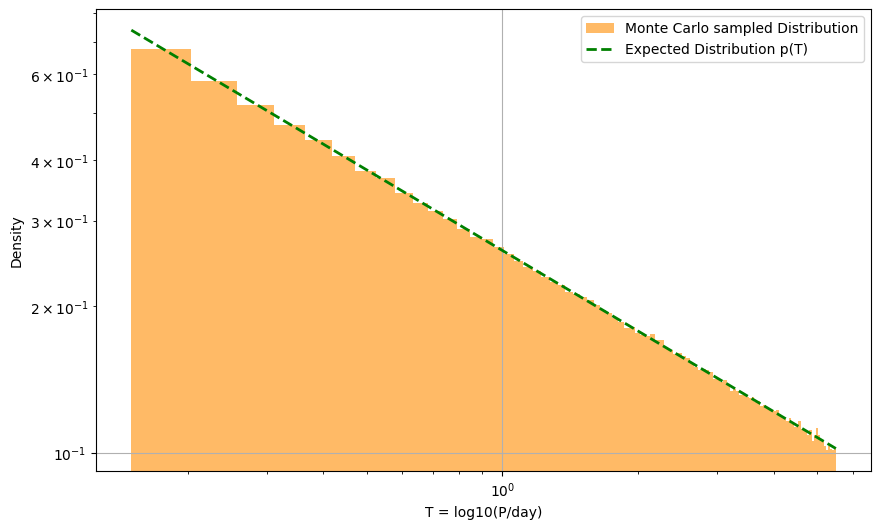

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Tmin = 0.15
Tmax = 5.5
C = 0.45 / (Tmax**0.45 - Tmin**0.45)

N_samples = 1000000

# Generate uniform random numbers between 0 and 1
x = np.random.uniform(0, 1, N_samples)

T_samples=((x*0.45/C)+(Tmin**0.45))**(1/0.45)

# Define the PDF function
def p(T):
    return C * T**(-0.55)

# Create a range of T values for the expected distribution
T_range = np.linspace(Tmin, Tmax, 10000)
expected_distribution = p(T_range)


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(T_samples, bins=100, density=True, alpha=0.6, color='darkorange', label='Monte Carlo sampled Distribution', histtype='stepfilled')
plt.plot(T_range, expected_distribution, 'g--', label='Expected Distribution p(T)', linewidth=2)

plt.yscale("log")
plt.xscale("log")
plt.xlabel('T = log10(P/day)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

$$
M = \int_0^{r_{max}} 4 \pi r^2 \left(\frac{\rho_0}{\frac{r}{r_s} \left(1 + \frac{r}{r_s}\right)^2}\right) dr. \rightarrow
M = 4 \pi \rho_0 r_s \int_0^{r_{max}} \frac{r^2}{r \left(1 + \frac{r}{r_s}\right)^2} , dr \rightarrow M = 4 \pi \rho_0 r_s \int_0^{r_{max}} \frac{r}{\left(1 + \frac{r}{r_s}\right)^2} , dr.
$$

$$
u = 1 + \frac{r}{r_s} \quad \Rightarrow \quad r = r_s (u - 1) \quad \Rightarrow \quad dr = r_s  du.
$$

When $r = 0, u = 1$, and when $r = r_{max}, u = 1 + \frac{r_{max}}{r_s} = 1 + 100 = 101.$



$$
M = 4 \pi \rho_0 r_s \int_1^{101} \frac{r_s (u - 1) r_s  du}{\left(u\right)^2}
\rightarrow M = 4 \pi \rho_0 r_s^3 \int_1^{101} \frac{(u - 1)}{u^2}  du.
$$

$$
M = 4 \pi \rho_0 r_s^3 \left( \int_1^{101} \frac{1}{u}  du - \int_1^{101} \frac{1}{u^2} , du \right).
$$


Then: $\int_1^{101} \frac{1}{u} du = \ln(101) - \ln(1) = \ln(101).$

and:$\int_1^{101} \frac{1}{u^2} , du = -\frac{1}{u} \bigg|_1^{101} = -\frac{1}{101} + 1 = 1 - \frac{1}{101} = \frac{100}{101}.$

$ \rightarrow M = 4 \pi \rho_0 r_s^3 \left( \ln(101) - \frac{100}{101} \right) \approx 4.55 \times 10^{12} M_\odot$